In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [50]:
n_pts = 500
centres = [[-1,1],[-1,-1],[1,-1],[1,1],[0,0]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=100, centers=centres,cluster_std=0.4)
#print(X)
#print(y)

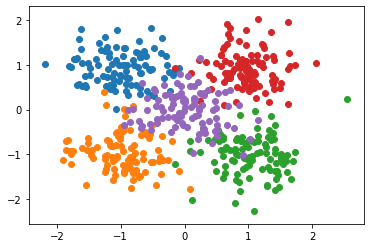

In [54]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1])



In [55]:
y_cat = to_categorical(y,5)


In [56]:
model = Sequential()
model.add(Dense(units=5, input_shape=(2,), activation='softmax'))
model.compile(Adam(0.1),loss='categorical_crossentropy',metrics=['accuracy'])

In [57]:
h=model.fit(x=X,y=y_cat, verbose=1, batch_size=50, epochs=100,)

Epoch 1/100
500/500 [==============================] - 0s 267us/step - loss: 1.0102 - accuracy: 0.5740
Epoch 2/100
500/500 [==============================] - 0s 69us/step - loss: 0.5535 - accuracy: 0.8340
Epoch 3/100
500/500 [==============================] - 0s 55us/step - loss: 0.4018 - accuracy: 0.9060
Epoch 4/100
500/500 [==============================] - 0s 100us/step - loss: 0.3419 - accuracy: 0.9100
Epoch 5/100
500/500 [==============================] - 0s 64us/step - loss: 0.3093 - accuracy: 0.9140
Epoch 6/100
500/500 [==============================] - 0s 68us/step - loss: 0.2896 - accuracy: 0.9160
Epoch 7/100
500/500 [==============================] - 0s 74us/step - loss: 0.2788 - accuracy: 0.9140
Epoch 8/100
500/500 [==============================] - 0s 75us/step - loss: 0.2679 - accuracy: 0.9180
Epoch 9/100
500/500 [==============================] - 0s 84us/step - loss: 0.2614 - accuracy: 0.9100
Epoch 10/100
500/500 [==============================] - 0s 68us/step - loss: 0.2

500/500 [==============================] - 0s 69us/step - loss: 0.2259 - accuracy: 0.9100
Epoch 81/100
500/500 [==============================] - 0s 46us/step - loss: 0.2219 - accuracy: 0.9160
Epoch 82/100
500/500 [==============================] - 0s 59us/step - loss: 0.2243 - accuracy: 0.9080
Epoch 83/100
500/500 [==============================] - 0s 61us/step - loss: 0.2231 - accuracy: 0.9120
Epoch 84/100
500/500 [==============================] - 0s 54us/step - loss: 0.2243 - accuracy: 0.9140
Epoch 85/100
500/500 [==============================] - 0s 45us/step - loss: 0.2242 - accuracy: 0.9120
Epoch 86/100
500/500 [==============================] - 0s 49us/step - loss: 0.2228 - accuracy: 0.9160
Epoch 87/100
500/500 [==============================] - 0s 58us/step - loss: 0.2209 - accuracy: 0.9180
Epoch 88/100
500/500 [==============================] - 0s 47us/step - loss: 0.2229 - accuracy: 0.9200
Epoch 89/100
500/500 [==============================] - 0s 64us/step - loss: 0.2218 - 

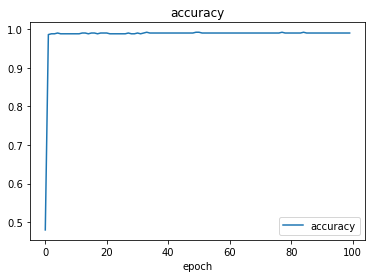

In [43]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

In [58]:
def plt_decision_boundry(X,y_cat,model):
    x_span = np.linspace(min(X[:,0])-1,max(X[:,0])+1)
    y_span = np.linspace(min(X[:,1])-1,max(X[:,1])+1)
    xx, yy = np.meshgrid(x_span,y_span)
    xx_,yy_ = xx.ravel(),yy.ravel()
    grid = np.c_[xx_,yy_]
    prediction = model.predict_classes(grid)
    z = prediction.reshape(xx.shape)
    plt.contourf(xx,yy,z)

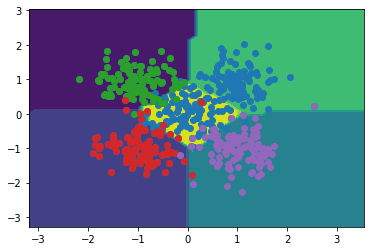

In [59]:
plt_decision_boundry(X,y_cat,model)
plt.scatter(X[:n_pts,0],X[:n_pts,1])
plt.scatter(X[n_pts:,0],X[n_pts:,1])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])

prediction is:  [4]


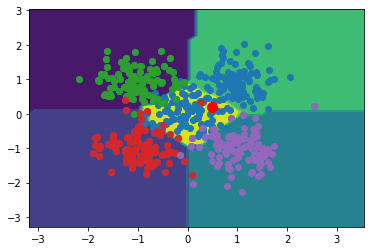

In [60]:
plt_decision_boundry(X,y_cat,model)
plt.scatter(X[:n_pts,0],X[:n_pts,1])
plt.scatter(X[n_pts:,0],X[n_pts:,1])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
x=0.5
y=0.2
point = np.array([[x,y]])
prediction = model.predict_classes(point)
plt.plot([x],[y],marker='o',markersize=10,color='r')
print("prediction is: ",prediction)